<a href="https://colab.research.google.com/github/Champioa00/LAB1/blob/master/Week5async.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anthonh Champion
Week 5 async homework

In [16]:
# Load the Needed Packages
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import collections
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
## Load data ##
corpus = pd.read_csv('https://raw.githubusercontent.com/Champioa00/LAB1/master/Week5718.csv')

In [45]:
# Just look at the first line of the data frame. 
corpus.iloc[0]

Palyer                                               Player A
Write_up    A dual-threat quarterback with two years of st...
Name: 0, dtype: object

In [46]:
print(corpus)

     Palyer                                           Write_up
0  Player A  A dual-threat quarterback with two years of st...
1  Player B  Pickett is an accurate passer with nice size. ...
2  Player C  Aidan Hutchinson has excellent potential, but ...
3  Player D  David Ojabo needs to get stronger for the NFL,...
4  Player E  Evan Neal is a 360-pound lineman who can move ...
5  Player F  Malik Willis has a huge arm and great mobility...
6  Player G  The Giants have an excellent secondary, but th...
7  Player H  Sam Howell threw for 38 touchdowns in 2019, wh...
8  Player I  Jordan Davis was a monster in the 2021 season ...
9  Player J  Derek Stingley had a freshman campaign for the...


In [37]:
# Remove special characters, lower-case all words, remove stop words, stem, and lemmatize

clean_text = []

for i in corpus.Write_up: 
    clean = [re.sub('[\W\_]', ' ', w) for w in i.split('\n')]
    lower = [y.lower() for y in clean]
    clean_text.append(lower)



In [38]:
# Check to see if it works 
print(clean_text[0])

['a dual threat quarterback with two years of starting experience at the college level  willis is a dynamic playmaker with both his arm and legs  at 6 1   he won t be the tallest quarterback in the class  but the nfl shouldn t hold that against him  at 215 pounds  he has an excellent build to hold up to the elevated physical rigors at the next level  that allows willis to play the game with impressive toughness  that presents itself in multiple ways  he can hang tough in the pocket and take a hit  furthermore  willis demonstrates grit as a ball carrier when escaping the pocket  he is challenging to take down in the open field due to his toughness and athletic ability  willis possesses exceptional athletic qualities  the liberty qb is fast  owns an excellent short area burst  and his change of direction is phenomenal  this allows him to be an entertaining  electric  and effective dual threat quarterback  willis is elusive both in and out of the pocket  shows stellar vision as a runner  

In [39]:
# Initiate English stop words
stop = stopwords.words('english')

# New list to house tokenized sentences and removed stopwords. 
rmv_stop_words = []

for i in clean_text: 
    i = str(i)
    i = re.sub(r"[^\w]", ' ', i)
    word_tokens = word_tokenize(i)
    no_stop_words = ' '.join([x for x in word_tokens if x not in stop])
    rmv_stop_words.append(no_stop_words)
    
# Print first sentence to compare with previous complete sentence. 
print(rmv_stop_words[0])

dual threat quarterback two years starting experience college level willis dynamic playmaker arm legs 6 1 tallest quarterback class nfl hold 215 pounds excellent build hold elevated physical rigors next level allows willis play game impressive toughness presents multiple ways hang tough pocket take hit furthermore willis demonstrates grit ball carrier escaping pocket challenging take open field due toughness athletic ability willis possesses exceptional athletic qualities liberty qb fast owns excellent short area burst change direction phenomenal allows entertaining electric effective dual threat quarterback willis elusive pocket shows stellar vision runner brilliantly creative comfortably dangerous quarterback terms mobility 2022 nfl draft class willis also possesses impressive arm draft class people arm liberty quarterback laser guided missile launcher cannon insert metaphor capable launching ball downfield relative ease routinely making throws leave flabbergasted however arm talent 

In [40]:
# List to append tokenized strings
tokens = []

# Tokenize stirngs with removed stop words
for i in rmv_stop_words:
    token = word_tokenize(i)
    tokens.append(token)

# Concatenate with original data frame
token_df = pd.DataFrame(np.array(tokens).reshape(-1, 1))
corpus_df = pd.concat((corpus, token_df), axis=1, ignore_index=True)
corpus_df.columns = ['Palyer', 'Write_up', 'token_report']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


willis : 14
arm : 8
pocket : 7
quarterback : 6
class : 6
ball : 6
nfl : 5
excellent : 5
take : 5
liberty : 5
level : 4
field : 4
draft : 4
making : 4
legs : 3
next : 3
impressive : 3
multiple : 3
qb : 3
areas : 3


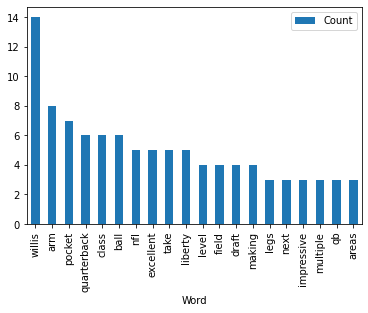

In [41]:
# build a dictionary and create a word cloud. 
Player_A = corpus_df.iloc[0, 2]

wordcount = {}

# Iterate over the word corpus to remove special characters  
for word in Player_A:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

# Print the 20 most common words. 
n_print = 20            
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": %d" % count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [42]:
# Import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

# Initiate sentiment intesity analyzer and create an array to store results
sia = SIA()
results = []

# Analyze line-by-line sentiment for top ten prospects, and print sentiment for first prospect
for line in corpus_df.Write_up:
    pol_score = sia.polarity_scores(line)
    pol_score['Write_up'] = line
    results.append(pol_score)

print(results[:1])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[{'neg': 0.055, 'neu': 0.707, 'pos': 0.237, 'compound': 0.9995, 'Write_up': 'A dual-threat quarterback with two years of starting experience at the college level, Willis is a dynamic playmaker with both his arm and legs. At 6’1″, he won’t be the tallest quarterback in the class, but the NFL shouldn’t hold that against him. At 215 pounds, he has an excellent build to hold up to the elevated physical rigors at the next level. That allows Willis to play the game with impressive toughness. That presents itself in multiple ways. He can hang tough in the pocket and take a hit. Furthermore, Willis demonstrates grit as a ball carrier when escaping the pocket. He is challenging to take down in the open field due to his toughness and athletic ability. Willis possesses exceptional athletic qualities. The Liberty QB is fast, owns an excellent short-area burst, and his chan